In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
articles = pd.read_json('data/filtered.jsonl', lines=True)

In [4]:
sb = articles[articles['fulltext'].str.contains('secrets? bancaires?', case=False)]

In [5]:
journal = sb.id.str.split('-').apply(lambda x: x[0])

In [6]:
ngrams = sb['fulltext'].groupby([journal,sb.date.apply(lambda x: x.year)]).count()

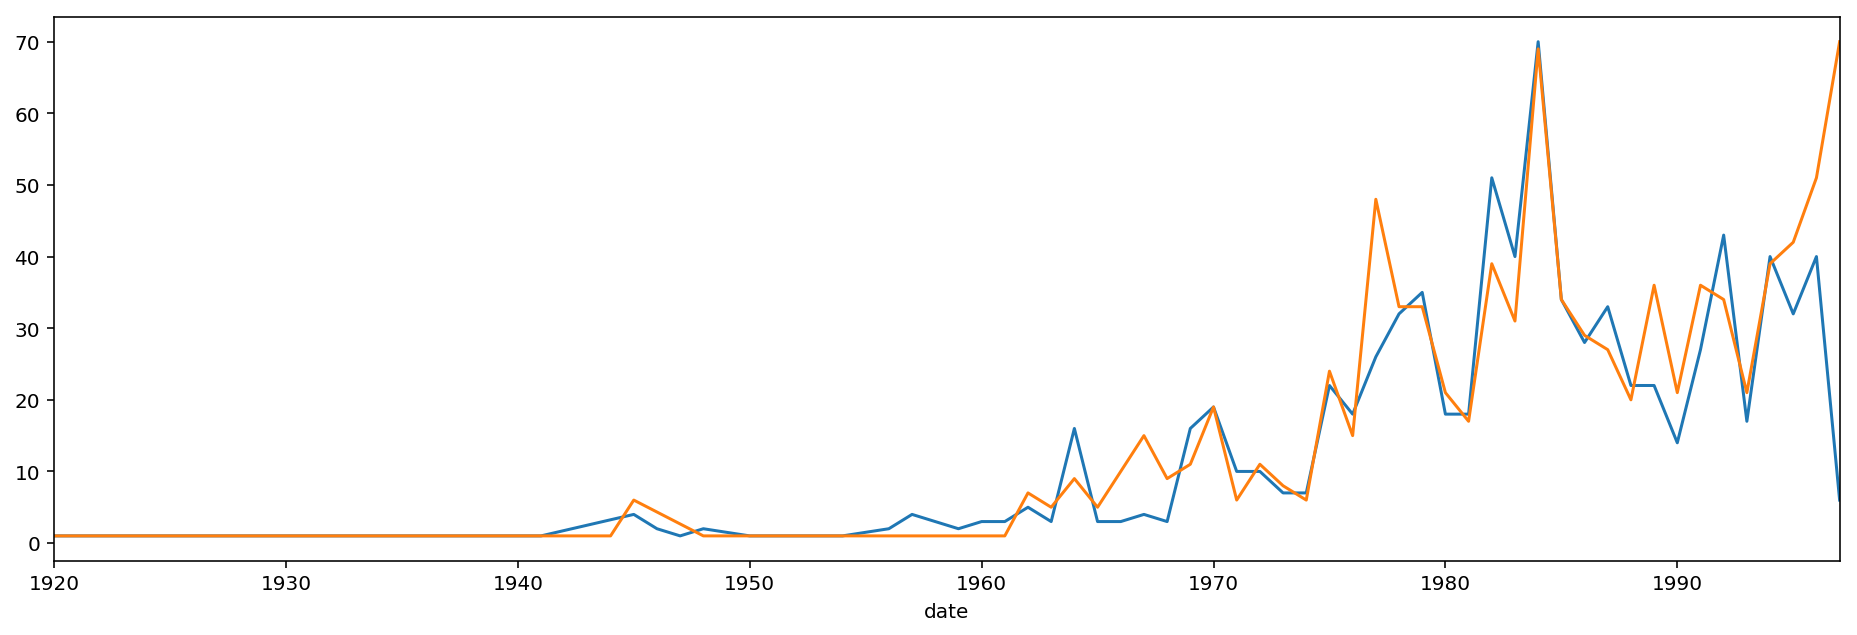

In [133]:
ngrams['GDL'].plot(); ngrams['JDG'].plot()


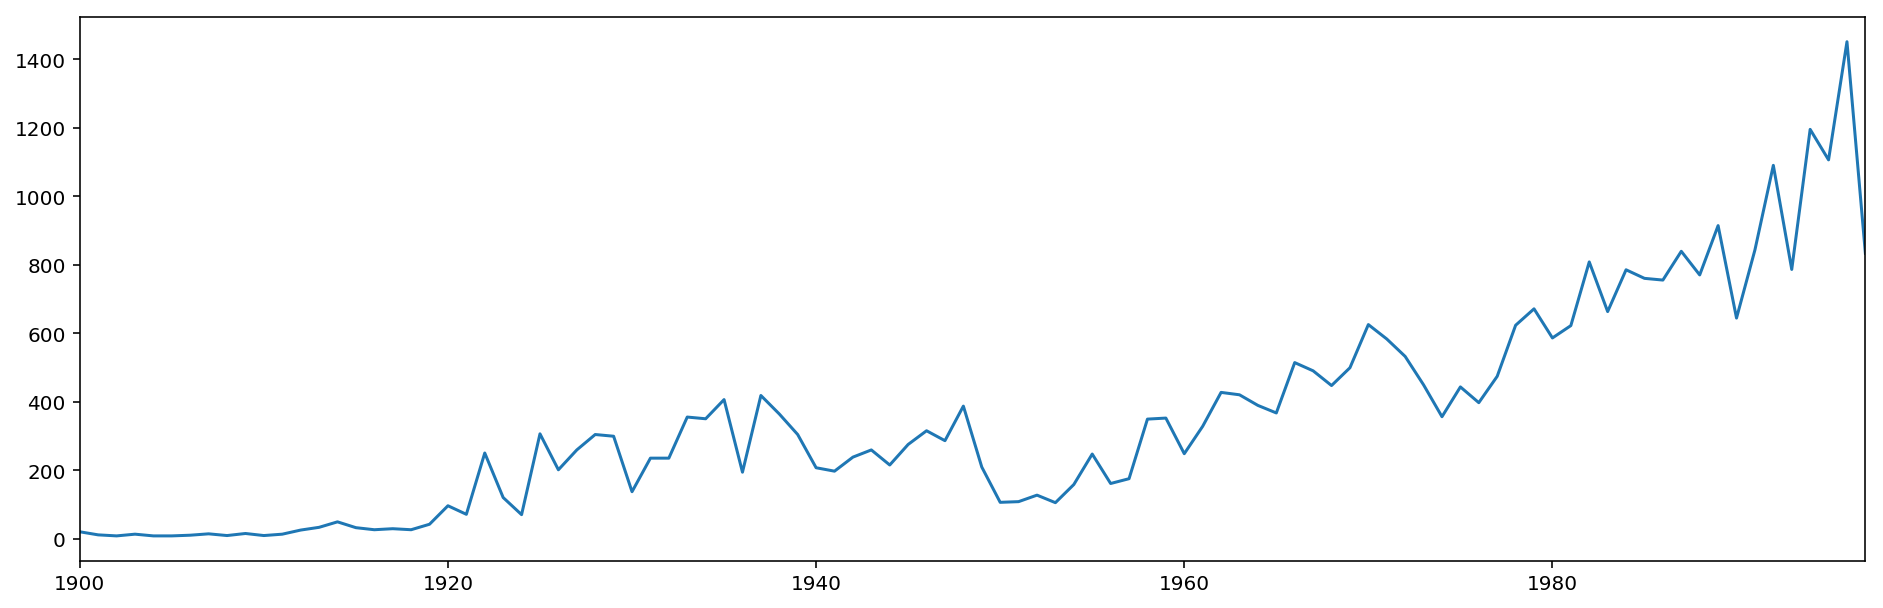

In [131]:
articles['date'].apply(lambda x: x.year).value_counts().sort_index().plot()

# compare to baseline and financial baseline?

In [47]:
pages = sb[['date', 'pages']].copy()
pages['pages'] = pages['pages'].apply(lambda l:l[0])

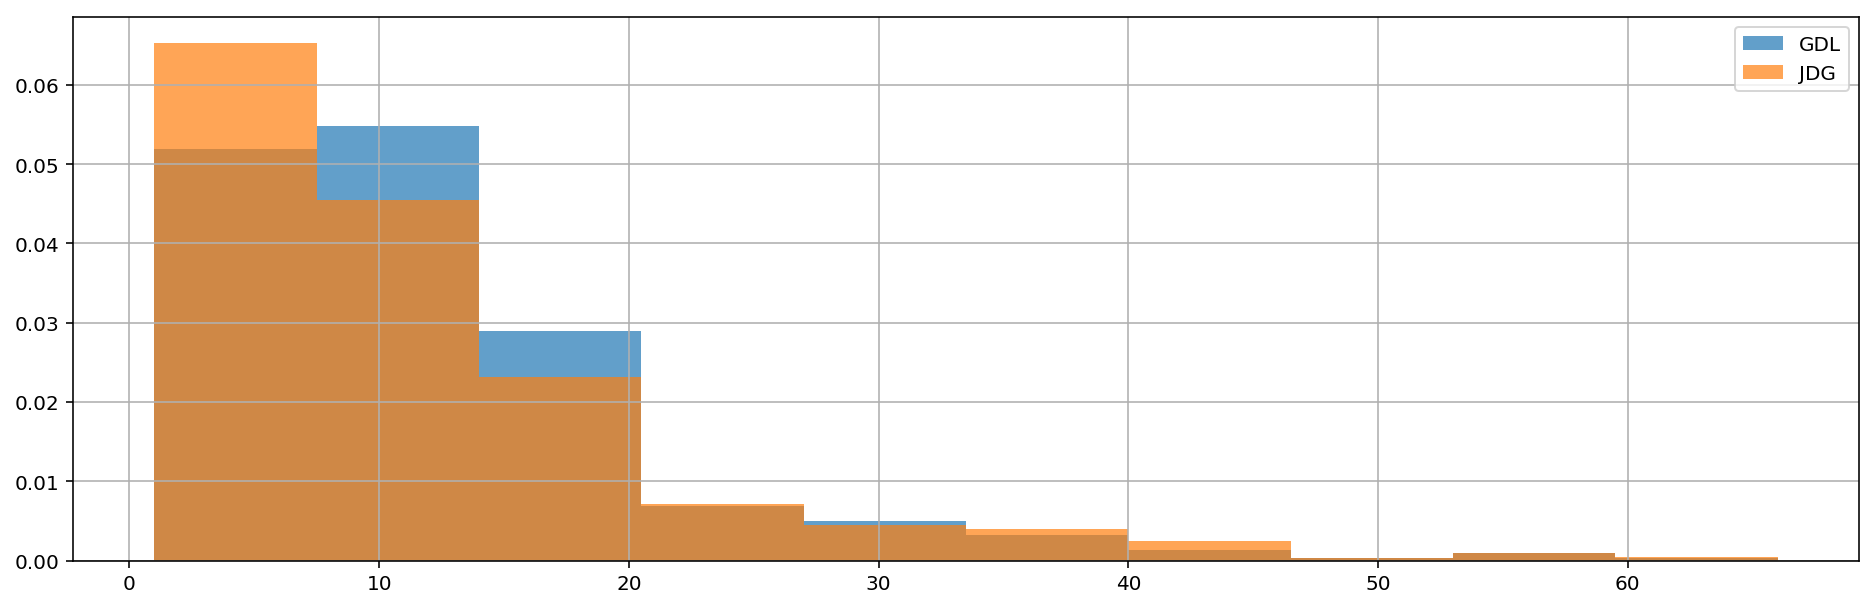

In [49]:
pages['pages'].groupby(journal).hist(density=True, alpha=0.7)
plt.legend(['GDL', 'JDG']) #TODO check order

# check distribution for random key word and then for financial key word

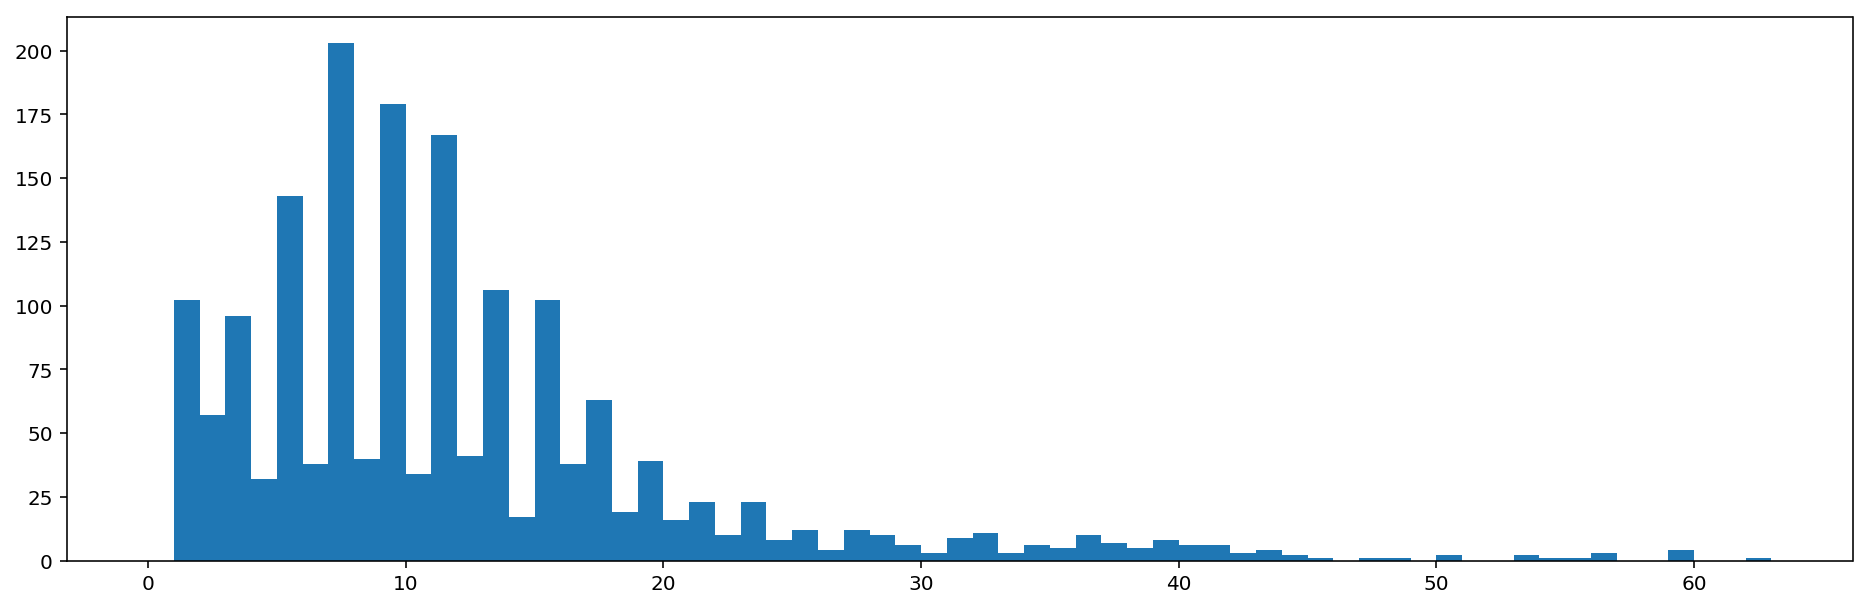

In [50]:
plt.hist(pages.pages, bins=range(64));

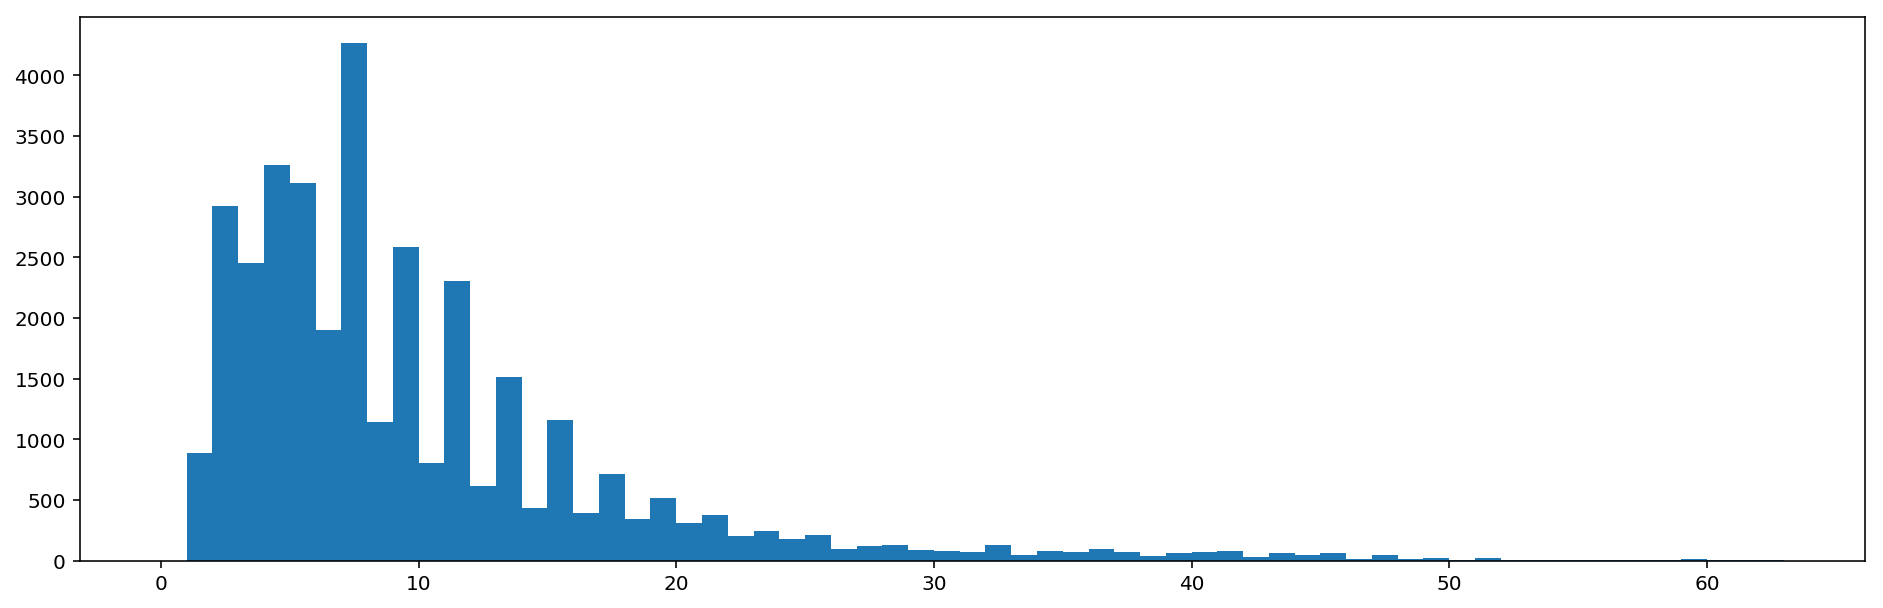

In [138]:
plt.hist(articles.pages.apply(min), bins=range(64));  #same for generic

# More for odd pages. why? Check random keywords and financial key word.

# Max pages per date

In [32]:
import json
import fileinput
import os

In [38]:
def date_page():
    for article in fileinput.input(map(lambda s: 'data/trimmed/'+ s, os.listdir('data/trimmed/'))):
        j = json.loads(article)
        yield j['date'], max(j['pages']) #return date and last page of article

In [67]:
datepage_df = pd.DataFrame(date_page(), columns=['date', 'pages'])

In [68]:
pages_per_date = datepage_df.groupby('date').max()

In [69]:
pages_per_date.index = pd.to_datetime(pages_per_date.index)

In [74]:
relative_pages = pages.merge(pages_per_date, on='date', suffixes=('', '_total'))

GDL    AxesSubplot(0.125,0.125;0.775x0.755)
JDG    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

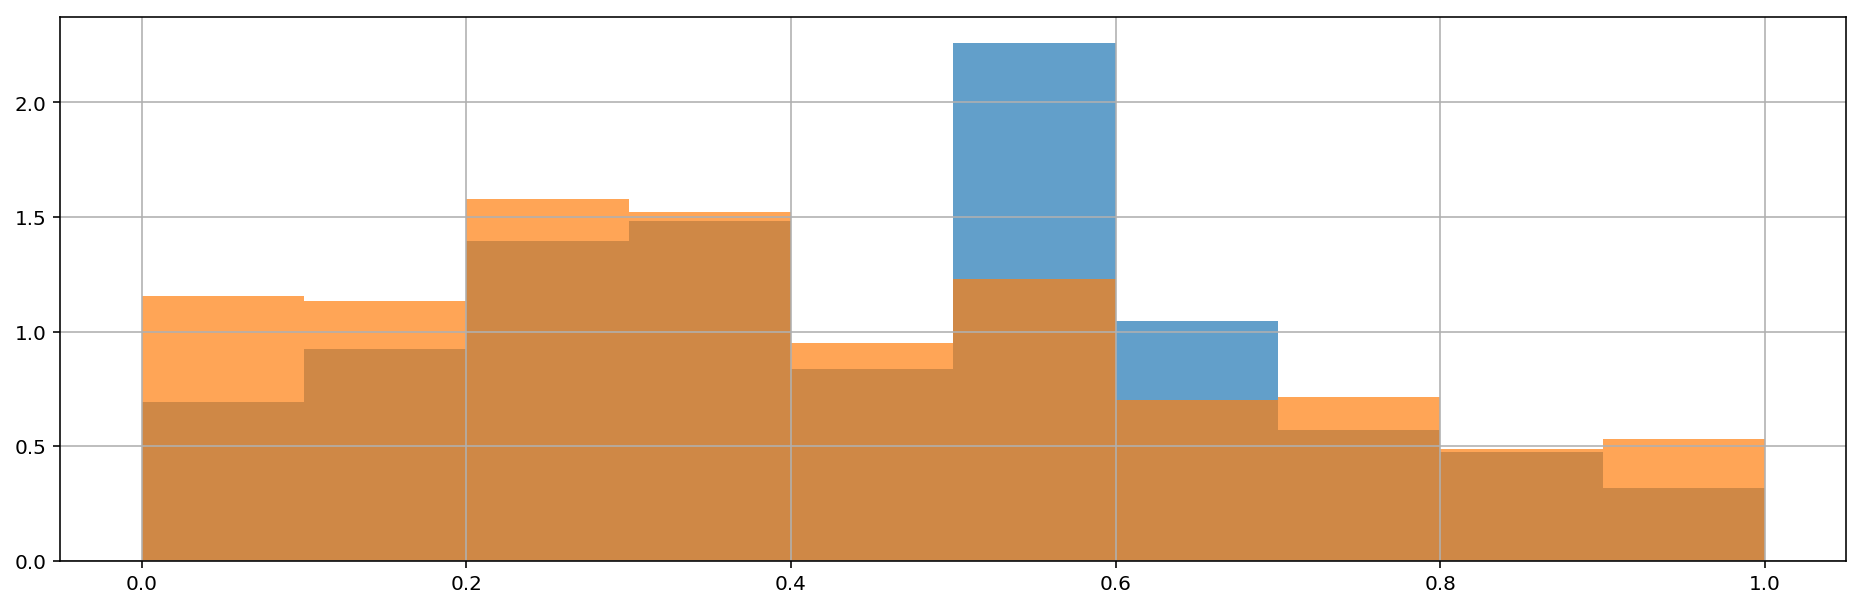

In [108]:
relative_pos = (relative_pages['pages'] / relative_pages['pages_total'])
relative_pos.groupby(journal.values).hist(bins=np.arange(11)/10, alpha=0.7, density=True)

# Find reason for peak

# Article lengths

id
GDL    AxesSubplot(0.125,0.125;0.775x0.755)
JDG    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fulltext, dtype: object

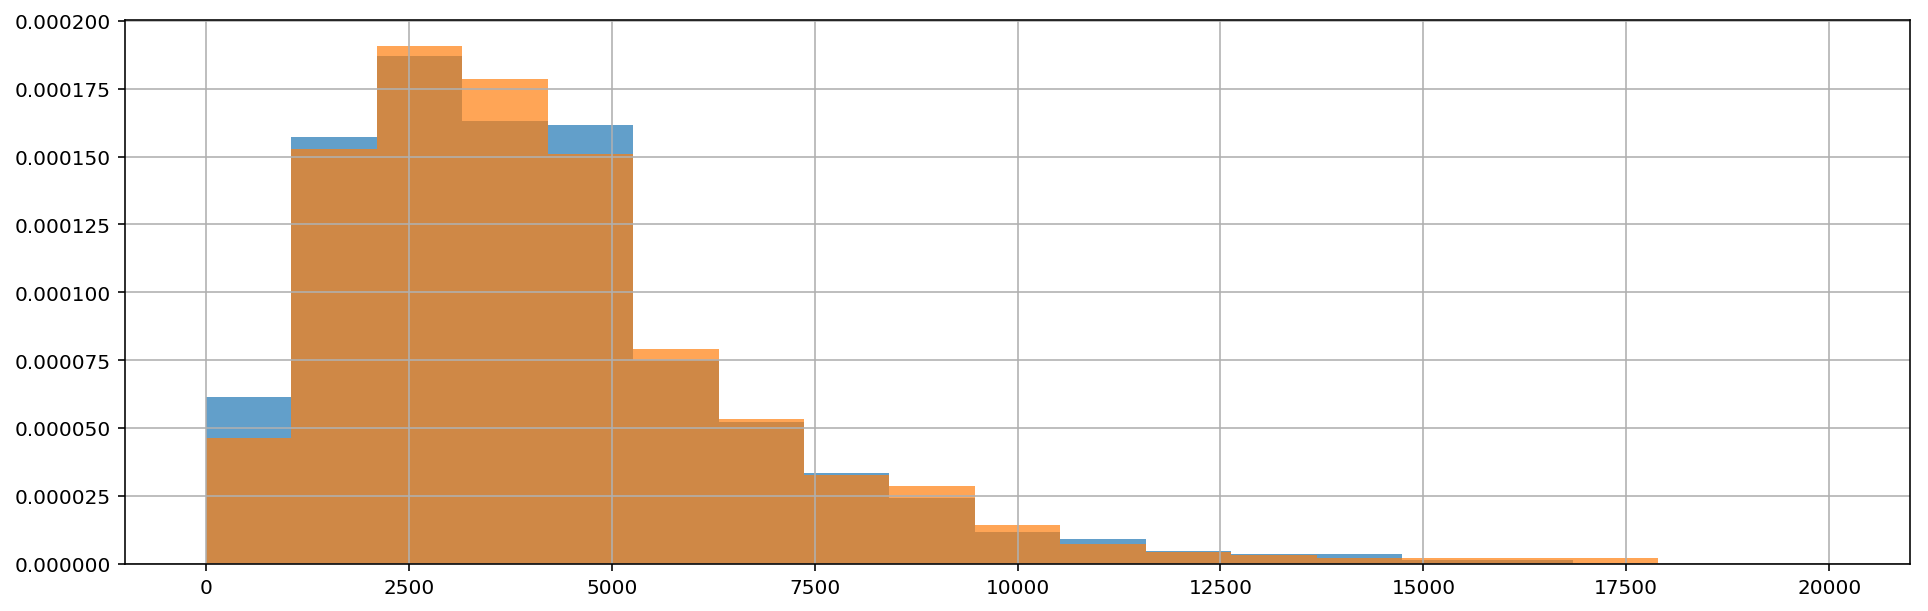

In [114]:
sb.fulltext.apply(len).groupby(journal).hist(bins = np.linspace(0,20000,20), density=True, alpha=0.7)

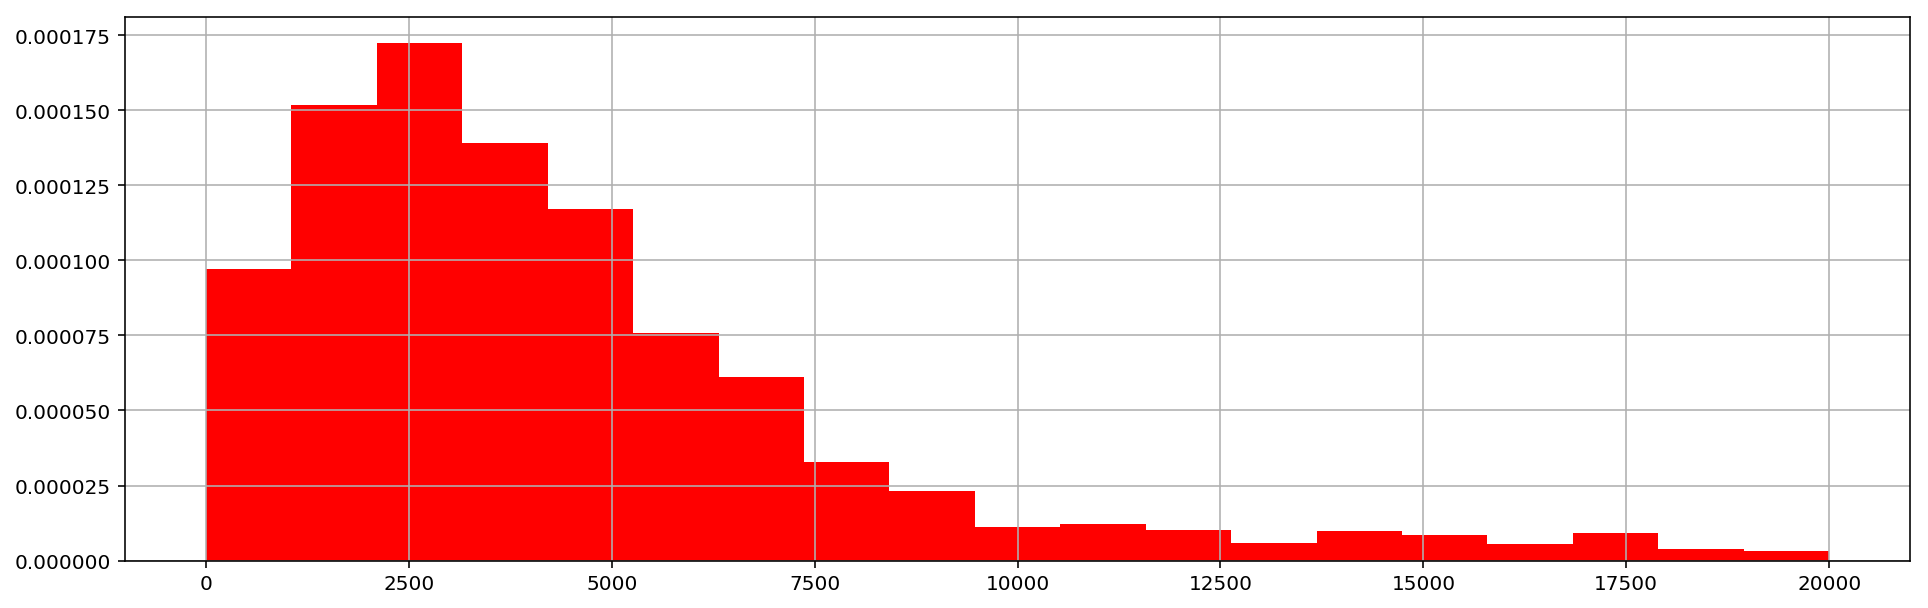

In [117]:
articles.fulltext.apply(len).hist(bins=np.linspace(0,20000,20), density=True, color='r')